In [1]:
#@title 
%%HTML
<div style="text-align:center; display:flex; justify-content:space-between;">
<div style="background-color:white; width:25%; height:150px; display: flex;">

<img src="https://giecaruff.github.io/sites/gss_semana_2020/logos/GSS_semana_geofisica.png" height="40%">

</div>
<div style="background-color:white; width:50%; height:150px; text-align:center;">

<br><br>

<span style="color:purple; font-size: 16pt;">Minicurso Python para Geofísicos <br></span>
<span style="color:purple; font-size: 25pt;font-weight: bold;"> Mapa da Anomalia da gravidade da América do Sul usando Cartopy </span>

</div>

<div style="background-color:white; width:25%; height:150px; text-align:right">
<img src="https://giecaruff.github.io/sites/gss_semana_2020/logos/logo_colorida_icone.png" height="60%">
</div>
</div>

<div style="background-color:white">
<br><br>
<center> <div style="background-color:white;width:172px;text-align:center;display:inline-block;"> <span style="color:#92d14f; font-size: 14pt;font-weight: bold;">Fernando Vizeu</span> <div><img src="https://giecaruff.github.io/sites/gss_semana_2020/integrantes/vizeu.jfif" width="150px" style="border-radius:50%;border-style: solid;"></div> <span style="color:#3991c9; font-size: 10pt">fvizeus@gmail.com</span> </div>
<div style="background-color:white;width:172px;text-align:center;display:inline-block;"> <span style="color:#92d14f; font-size: 14pt;font-weight: bold;">Mário Martins</span> <div><img src="https://giecaruff.github.io/sites/gss_semana_2020/integrantes/mario_machine.png" width="150px" style="border-radius:50%;border-style: solid;"></div> <span style="color:#3991c9; font-size: 10pt">mario_martins@id.uff.br</span> </div>
<div style="background-color:white;width:172px;text-align:center;display:inline-block;"> <span style="color:#92d14f; font-size: 14pt;font-weight: bold;">Rodrigo Mota</span> <div><img src="https://giecaruff.github.io/sites/gss_semana_2020/integrantes/rodrigo_dutra.jfif" width="150px" style="border-radius:50%;border-style: solid;"></div> <span style="color:#3991c9; font-size: 10pt">dutrarodrigo@id.uff.br</span> </div>
<div style="background-color:white;width:172px;text-align:center;display:inline-block;"> <span style="color:#92d14f; font-size: 14pt;font-weight: bold;">Rodrigo Bijani</span> <div><img src="https://giecaruff.github.io/sites/gss_semana_2020/integrantes/rodrigo_bijani.jfif" width="150px" style="border-radius:50%;border-style: solid;"></div> <span style="color:#3991c9; font-size: 10pt">rodrigobijani@id.uff.br</span> </div>

</div>

> # <center>  Agradecimento especial:
> ### <center> Allan Soares Ramalho - Graduação Geofísica (UFF)  


 ## Sumário:

1.   Importação das bibliotecas;
      - Pandas (leitura de dados);
      > -Leitura do arquivo **gravity_real.txt**
      - Cartopy (mapas em projeção);
      - Numpy (numérica e leitura de dados);
      > - Função np.loadtxt( ) para a leitura do arquivo **gravity_normal.txt**
      - Matplotlib.pyplot (gráficos em geral);

2.   Modelos Globais;
      - *International Centre for Global Earth Models* (ICGEM - http://icgem.gfz-potsdam.de/home);
      - A gravidade real e normal;
      - Cálculo da anomalia da gravidade $\Delta g$;
      
3.  Mapas em projeção cartográfica;
      - Um pouco sobre o Cartopy; <br>
      - Mapa da Anomalia da gravidade da América do Sul; <br>
      - Utilização de arquivos em formato shape no cartopy;



## Etapa 01: Importar as bibliotecas necessárias:

In [8]:
# Importar as bibliotecas necessarias:
import numpy as np
import pandas as pd
import cartopy 

ModuleNotFoundError: ignored

In [9]:
!apt-get -qq install python-cartopy python3-cartopy
import cartopy

Selecting previously unselected package python-pkg-resources.
(Reading database ... 144579 files and directories currently installed.)
Preparing to unpack .../0-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-pyshp.
Preparing to unpack .../1-python-pyshp_1.2.12+ds-1_all.deb ...
Unpacking python-pyshp (1.2.12+ds-1) ...
Selecting previously unselected package python-shapely.
Preparing to unpack .../2-python-shapely_1.6.4-1_amd64.deb ...
Unpacking python-shapely (1.6.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../3-python-six_1.11.0-2_all.deb ...
Unpacking python-six (1.11.0-2) ...
Selecting previously unselected package python-cartopy:amd64.
Preparing to unpack .../4-python-cartopy_0.14.2+dfsg1-2build3_amd64.deb ...
Unpacking python-cartopy:amd64 (0.14.2+dfsg1-2build3) ...
Selecting previously unselected package python3-pkg-resources.
Preparing to unpack .../5-pyth

## Etapa 02: Acesso aos arquivos contidos no diretório dados (método colab adotado neste minicurso):

In [6]:
# Codigo baseado nas concepções do google colab:
!mkdir -p dados # criacao do diretorio dados:
!wget --no-check-certificate "https://docs.google.com/uc?export=download&id=1hfO6yYXUIwqJ1eVaU-9ynBFcNl1Hduyq" -O dados/gravity_real.txt
!wget --no-check-certificate "https://docs.google.com/uc?export=download&id=1iIl3wRsU-aq3YKWCueeeIzxXiLlPhEJR" -O dados/gravity_normal.txt
!wget --no-check-certificate "https://docs.google.com/uc?export=download&id=15wPsvE4662oV_gJtV_PBMk-8sJ7MSjrk" -O dados/grandes_regioes_shp.shp 

--2020-09-10 01:13:21--  https://docs.google.com/uc?export=download&id=1hfO6yYXUIwqJ1eVaU-9ynBFcNl1Hduyq
Resolving docs.google.com (docs.google.com)... 173.194.213.113, 173.194.213.101, 173.194.213.138, ...
Connecting to docs.google.com (docs.google.com)|173.194.213.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-8c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/p3hjlm8khpg6crlnpedgh48dtr250pj1/1599700350000/14579245554516633897/*/1hfO6yYXUIwqJ1eVaU-9ynBFcNl1Hduyq?e=download [following]
--2020-09-10 01:13:21--  https://doc-0s-8c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/p3hjlm8khpg6crlnpedgh48dtr250pj1/1599700350000/14579245554516633897/*/1hfO6yYXUIwqJ1eVaU-9ynBFcNl1Hduyq?e=download
Resolving doc-0s-8c-docs.googleusercontent.com (doc-0s-8c-docs.googleusercontent.com)... 173.194.216.132, 2607:f8b0:400c:c12::84
Connecting to doc-0s-8c-docs.googleusercontent.com (doc-0s

## <center> Aplicação Imediata do pandas: Leitura de arquivos <center>
> A leitura e escrita de arquivos é crucial para o desenvolvimento da ciência experimental. Sem ela torna-se complicado a comunicação os dados adquiridos nas expedições de campo com o intérprete. Desta forma, todas as linguagens de programação apresentam esta capacidade, em especial o python. Vamos estudar neste script alguns exemplos simples de leitura de arquivos com diferentes formatos através das funções do pandas. <br>


>> Para mais detalhes, convido-os à visitar os seguintes links: <br>
LINK: https://paulovasconcellos.com.br/28-comandos-%C3%BAteis-de-pandas-que-talvez-voc%C3%AA-n%C3%A3o-conhe%C3%A7a-6ab64beefa93 <br>
>> LINK:https://pandas.pydata.org/pandas-docs/stable/dsintro.html

## Etapa 03: Leitura do arquivo **gravity_real.txt** através da biblioteca Pandas:

In [10]:
# Leitura do arquivo via pandas:

# Criando um cabeçalho para o primeiro dataframe (gravidade Real):
cabecalho1 = ['Lon', 'Lat', 'N', 'Gabs']

# Comando de Leitura (Pandas):
data = pd.read_csv('dados/gravity_real.txt',header=32, 
                   delimiter='\s+', usecols=(0,1,2,3), names=cabecalho1)


## Etapa 3.1: Leitura do arquivo **gravity_normal.txt** usando o numpy.loadtxt:

In [11]:
gamma0 = np.loadtxt('dados/gravity_normal.txt', skiprows=34, usecols=2 )

## <center> **Aspectos teóricos fundamentais** <br>

### A anomalia da gravidade $ \Delta g$ pode ser definida por meio da seguinte expressão:

## <center> $ \Delta \overrightarrow{g} = \overrightarrow{g}_{obs}  - \overrightarrow{\gamma}_{o}$, <br>

### em que $\overrightarrow{g}_{obs}$ é a gravidade absoluta, em mGal e $\overrightarrow{\gamma}_o$ é a gravidade normal. A primeira é a gravidade absoluta em relação Geóide (i.e., ao nível médio dos mares não perturbados). Já a segunda tem como referência o elipsóide de revolução (também chamado de Terra Normal). Você sabe o que são esses conceitos?

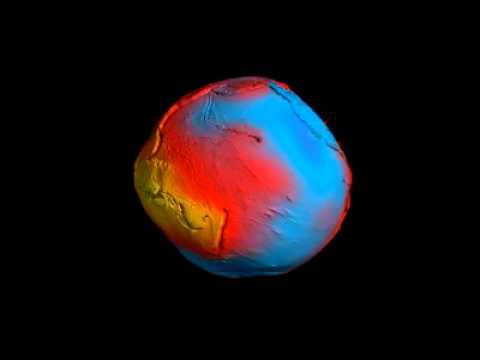

In [ ]:
# Embebendo um vídeo do youtube no Colab (valeu seu Mário!)
from IPython.display import YouTubeVideo
YouTubeVideo('F9FtljxHqzU')


### <center> Geóide $\rightarrow$ Uma superfície equipotencial que representa o nível médio dos mares não perturbados. É a melhor representação da forma da Terra (Terra Real);

### <center> Elipsóide de revolução $\rightarrow$ Superfície equipotencial cujas massa e velocidade de rotação são semelhantes a da Terra. Funciona como uma forma aproximada para a Terra (nesta caso, chamada de Terra Normal). Muitos avanços a respeito da forma da Terra foram alcançados a partir desta definição.<br>

### <center> Depois desta simplória introdução, vamos por a mão na massa?



## Etapa 4: Incorporar a coluna '$\gamma_0$' ao dataframe data:

In [12]:
# Codigo aqui:
data['Gnorm'] = gamma0

In [13]:
data

,Lon,Lat,N,Gabs,Gnorm
0,276.33,14.55,68.8,978368.081772,978390.171235
1,276.63,14.55,14.2,978379.836111,978384.867832
2,276.93,14.55,0.0,978382.697464,978383.207414
3,277.23,14.55,0.0,978375.523960,978375.899362
4,277.53,14.55,0.0,978381.927308,978382.239847
...,...,...,...,...,...
42451,327.03,-58.35,0.0,981814.023749,981821.198236
42452,327.33,-58.35,0.0,981807.293920,981814.475354
42453,327.63,-58.35,0.0,981816.921922,981824.198554
42454,327.93,-58.35,0.0,981819.063613,981826.403190


## Etapa 5: Fazer o gráfico das grandezas através do MatPlotLib (função scatter):

In [14]:
import matplotlib.pyplot as plt

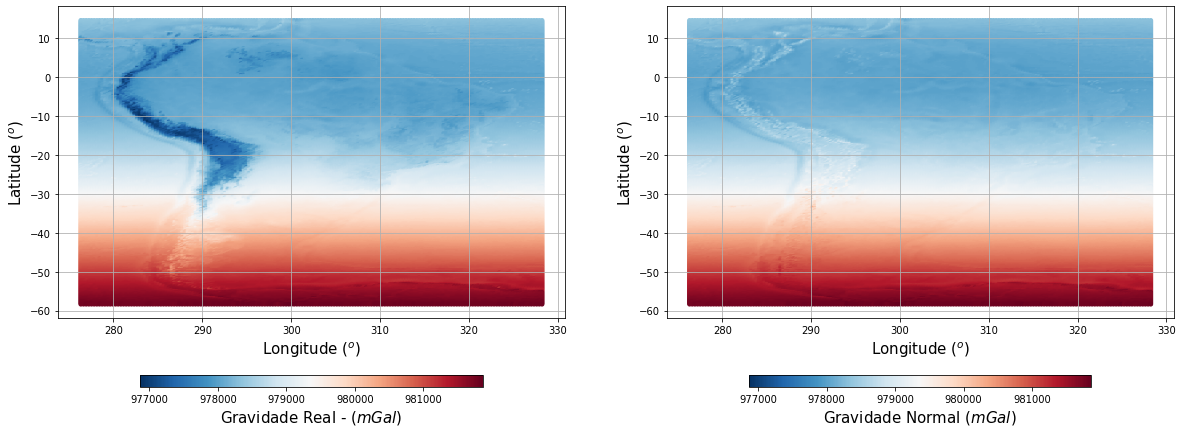

In [15]:
# Graficos em Lon Lat:
# Abrir a janela onde o grafico sera feito:
fig = plt.figure(figsize=(20,7), facecolor='w')

# Acionar o modo multiplas janelas
plt.subplot(1,2,1) # 1 linha, 2 colunas, posicao deste plot

#################### PRIMEIRO GRAFICO ##############################################

# Comandos para definir os eixos do gráfico:
plt.xlabel('Longitude ($^o$)', fontsize = 15)
plt.ylabel('Latitude ($^o$)', fontsize = 15)

# Funcao scatter:
p1 = plt.scatter(data.Lon, data.Lat, s=60.0, c=data.Gabs, marker='.', cmap='RdBu_r',
                 vmin = data.Gabs.min(), vmax= data.Gabs.max() )

# Detalhes sobre a barra de cores:
cbar = plt.colorbar(p1, aspect=30, fraction = 0.03, orientation="horizontal")
cbar.set_label('Gravidade Real - $ (mGal) $',fontsize=15, rotation = 0)
plt.grid()


#################### SEGUNDO GRAFICO ##############################################
plt.subplot(1,2,2)
plt.xlabel('Longitude ($^o$)', fontsize = 15)
plt.ylabel('Latitude ($^o$)', fontsize = 15)
p2 = plt.scatter(data.Lon, data.Lat, s=60.0, c=data.Gnorm, marker='.', cmap='RdBu_r',
                 vmin = data.Gabs.min(), vmax = data.Gabs.max())
cbar = plt.colorbar(p2, aspect=30, fraction = 0.03, orientation="horizontal")
cbar.set_label('Gravidade Normal $(mGal)$',fontsize=15,rotation = 0)
plt.grid()
plt.show()

### <center> Você percebeu algo "estranho" nos gráficos?

In [16]:
# Codigo aqui:
data['Lon'] = data.Lon - 360.0
data.Lon

0       -83.67
1       -83.37
2       -83.07
3       -82.77
4       -82.47
         ...  
42451   -32.97
42452   -32.67
42453   -32.37
42454   -32.07
42455   -31.77
Name: Lon, Length: 42456, dtype: float64

### Etapa 6: Realizar o cálculo da anomalia da gravidade ($ \Delta \overrightarrow{g} = \overrightarrow{g}_{obs}  - \overrightarrow{\gamma}_{o}$) 

In [17]:
# Codigo aqui:
deltag = data.Gabs - data.Gnorm

# Incorporar ao dataframe data:
data['Anom'] = deltag


In [18]:
# Vamos verificar o dataFrame com as inclusoes:
data

,Lon,Lat,N,Gabs,Gnorm,Anom
0,-83.67,14.55,68.8,978368.081772,978390.171235,-22.089463
1,-83.37,14.55,14.2,978379.836111,978384.867832,-5.031722
2,-83.07,14.55,0.0,978382.697464,978383.207414,-0.509950
3,-82.77,14.55,0.0,978375.523960,978375.899362,-0.375402
4,-82.47,14.55,0.0,978381.927308,978382.239847,-0.312539
...,...,...,...,...,...,...
42451,-32.97,-58.35,0.0,981814.023749,981821.198236,-7.174486
42452,-32.67,-58.35,0.0,981807.293920,981814.475354,-7.181434
42453,-32.37,-58.35,0.0,981816.921922,981824.198554,-7.276632
42454,-32.07,-58.35,0.0,981819.063613,981826.403190,-7.339578


## Etapa 7: Plot da anomalia da gravidade para verificação:

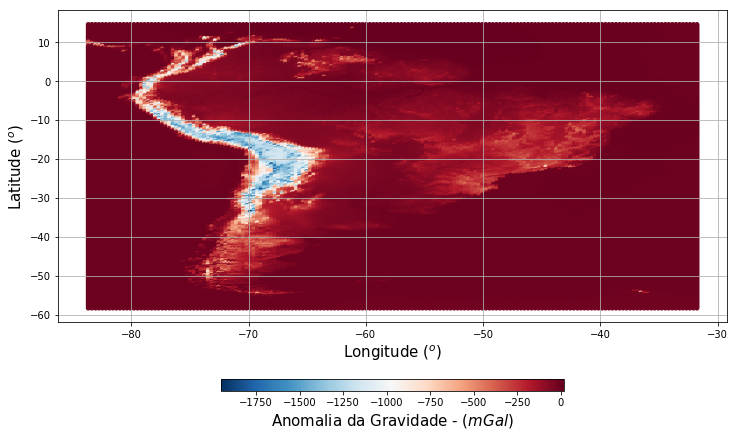

In [ ]:
# Graficos em Lon Lat:
fig = plt.figure(figsize=(12,7), facecolor='w')

# Comandos para definir os eixos do gráfico:
plt.xlabel('Longitude ($^o$)', fontsize = 15)
plt.ylabel('Latitude ($^o$)', fontsize = 15)

# Funcao scatter:
p1 = plt.scatter(data.Lon, data.Lat, s=60.0, c=data.Anom, marker='.', cmap='RdBu_r',
                 vmin = data.Anom.min(), vmax= data.Anom.max() )

# Detalhes sobre a barra de cores:
cbar = plt.colorbar(p1, aspect=30, fraction = 0.03, orientation="horizontal")
cbar.set_label('Anomalia da Gravidade - $ (mGal) $',fontsize=15, rotation = 0)
plt.grid()

## <center> Mas esses mapas não estão adequadamente referenciados e projetados em sistemas de coordenadas reais. Como podemos fazer para que os mapas tornem-se mais "adequados"??

## Vamos importar as funções necessárias para utilizar o cartopy:

In [20]:
# tipos de projecao cartograficas: 
import cartopy.crs as ccrs 
# Edicao dos eixos da figura:
#from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER 

# Leitura de arquivos tipo shape:
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
import cartopy.feature as cfeature


### Etapa 8: Criando o ambiente gráfico com as latitudes e longitudes desejadas:

In [24]:
# Area de plot através de comandos do Pandas:
LatMin = data.Lat.min()
LatMax = data.Lat.max()
LonMin = data.Lon.min()
LonMax =data.Lon.max()

# escrevendo na tela para a verificação:
print('Longitude minima=', LonMin)
print('Longitude maxima=', LonMax)
print('Latitude minima=', LatMin)
print('Latitude máxima=', LatMax)

Longitude minima= -83.67000000000002
Longitude maxima= -31.769999999999982
Latitude minima= -58.35
Latitude máxima= 14.55


### Etapa 9: Definição do tipo de Projeçao Cartográfica utilizada:
https://scitools.org.uk/cartopy/docs/latest/crs/projections.html

In [ ]:
# Definicao das dimensões da janela gráfica:
fig = plt.figure(figsize=(10,8)) # 20 pixels em x e 12 em y

# tipo de projecao utilizada:
projecao = ccrs.PlateCarree(central_longitude=(LonMax+LonMin)/2.0)

# Criacao do ambiente com o tipo de projecao desejada:
ax = fig.add_subplot(111, projection=projecao)

ax.set_extent([LonMin-2.5, LonMax+2.5,LatMin-2.5, LatMax+2.5]
              ,projecao) # Tipos de projeções


plt.show()

Geometry must be a Point or LineString


### Etapa 9: Adicionando as linhas de grade:

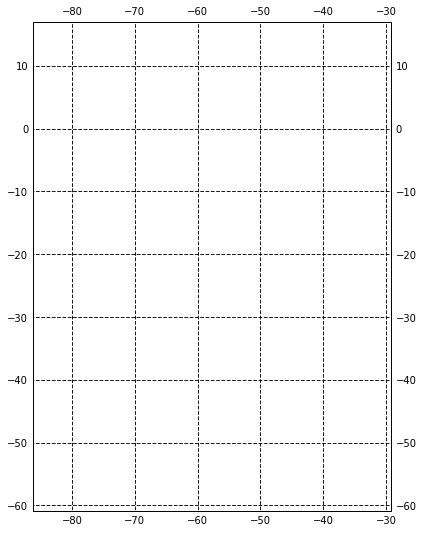

In [ ]:
# Definicao das dimensões da janela gráfica:
n = 10 # dimensao em pixels na direcao x
m = 9  # dimensao em pixels na direcao y

fig = plt.figure(figsize=(n,m) ) # n pixels em m e 12 em y

# Criacao do ambiente com o tipo de projecao desejada:
ax = fig.add_subplot(111, projection=projecao )

ax.set_extent([data.Lon.min()-2.5, data.Lon.max()+2.5, 
               data.Lat.min()-2.5, data.Lat.max()+2.5]
              , projecao)

#adicionando linhas de grade
g1 = ax.gridlines(crs=projecao, 
                  draw_labels=True, linestyle='--', 
                  linewidth=1,
                  color='black',
                  alpha=0.9)

plt.show()


### Etapa 10: Plot dos contornos das grandes regiões do Brasil via arquivo shape:

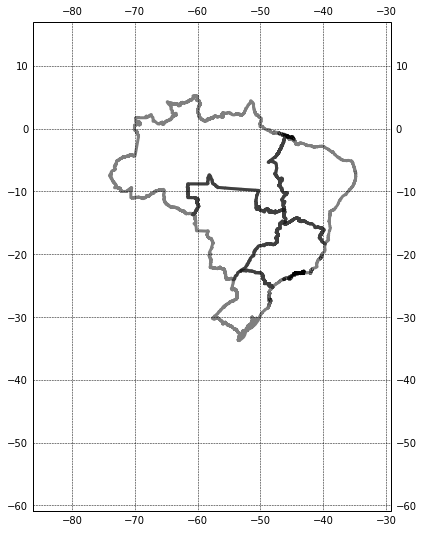

In [ ]:
# Definicao das dimensões da janela gráfica:
n = 10 # dimensao em pixels na direcao x
m = 9  # dimensao em pixels na direcao y

fig = plt.figure(figsize=(n,m)) # n pixels em m e 12 em y

# Criacao do ambiente com o tipo de projecao desejada:
ax = fig.add_subplot(111, projection=projecao )

# Area do grafico:
ax.set_extent([data.Lon.min()-2.5, data.Lon.max()+2.5, 
               data.Lat.min()-2.5, data.Lat.max()+2.5]
              , projecao)

#adicionando linhas de grade
g1 = ax.gridlines(crs=projecao, 
                  draw_labels=True, linestyle='--', 
                  linewidth=0.5,
                  color='black',
                  alpha=1)

# importando o shape das regioes do brasil:
fname='grandes_regioes/grandes_regioes_shp.shp'

#adicionando os contornos das grandes regiões brasileiras via arquivo shape:
ax.add_geometries(Reader(fname).geometries(),
                  projecao,facecolor='none',
                  edgecolor='black', linewidth=3,alpha=0.5)

plt.show()

### Etapa 11: Plotar a Anomalia da Gravidade dentro deste mapa via plt.scatter()

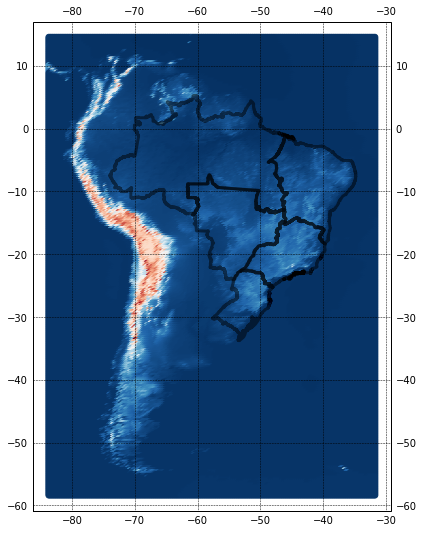

In [ ]:
# Definicao das dimensões da janela gráfica:
n = 10 # dimensao em pixels na direcao x
m = 9  # dimensao em pixels na direcao y

fig = plt.figure(figsize=(n,m)) # n pixels em m e 12 em y

# Criacao do ambiente com o tipo de projecao desejada:
ax = fig.add_subplot(111, projection=projecao )

# Area do grafico:
ax.set_extent([data.Lon.min()-2.5, data.Lon.max()+2.5, 
               data.Lat.min()-2.5, data.Lat.max()+2.5]
              , projecao)

#adicionando linhas de grade
g1 = ax.gridlines(crs=projecao, 
                  draw_labels=True, linestyle='--', 
                  linewidth=0.5,
                  color='black',
                  alpha=1)

# importando o shape das regioes do brasil:
fname='grandes_regioes/grandes_regioes_shp.shp'

#adicionando os contornos das grandes regiões brasileiras via arquivo shape:
ax.add_geometries(Reader(fname).geometries(),
                  projecao,facecolor='none',
                  edgecolor='black', linewidth=3,alpha=0.5)

#adicionando o scatter com as informaçoes dos dataframes
f2=ax.scatter(data.Lon, data.Lat,
              c=data.Anom,
              cmap='RdBu',
              vmin=data.Anom.min(), vmax=data.Anom.max(),
              transform=projecao)



plt.show()

### Etapa 12: Editando um pouco mais o gráfico:

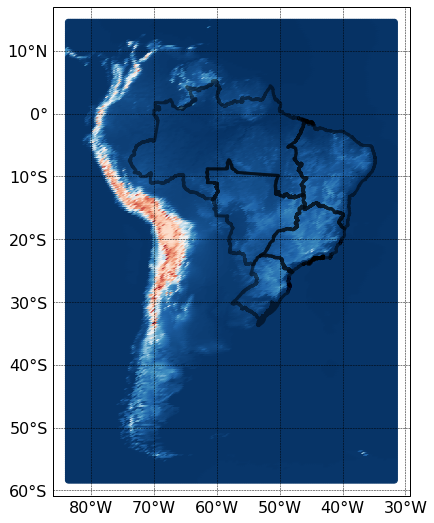

In [ ]:
# Definicao das dimensões da janela gráfica:
n = 10 # dimensao em pixels na direcao x
m = 9  # dimensao em pixels na direcao y

fig = plt.figure(figsize=(n,m)) # n pixels em m e 12 em y

# Criacao do ambiente com o tipo de projecao desejada:
ax = fig.add_subplot(111, projection=projecao )

# Area do grafico:
ax.set_extent([data.Lon.min()-2.5, data.Lon.max()+2.5, 
               data.Lat.min()-2.5, data.Lat.max()+2.5]
              , projecao)

#adicionando linhas de grade
g1 = ax.gridlines(crs=projecao, 
                  draw_labels=True, linestyle='--', 
                  linewidth=0.5,
                  color='black',
                  alpha=1)

# importando o shape das regioes do brasil:
fname='grandes_regioes/grandes_regioes_shp.shp'

#adicionando os contornos das grandes regiões brasileiras via arquivo shape:
ax.add_geometries(Reader(fname).geometries(),
                  projecao,facecolor='none',
                  edgecolor='black', linewidth=3,alpha=0.5)

#adicionando o scatter com as informaçoes dos dataframes
f2=ax.scatter(data.Lon, data.Lat,
              c=data.Anom,
              cmap='RdBu',
              vmin=data.Anom.min(), vmax=data.Anom.max(),
              transform=projecao)

#removendo os eixos do lado direito e de cima
g1.ylabels_right = False
g1.xlabels_top = False

#formatando os eixos para georreferenciar
g1.yformatter = LATITUDE_FORMATTER
g1.xformatter = LONGITUDE_FORMATTER

g1.xlabel_style = {'size': 16}
g1.ylabel_style = {'size': 16}

plt.show()

### Etapa 13: Colocando e editando as informações contidas na barra de cores:

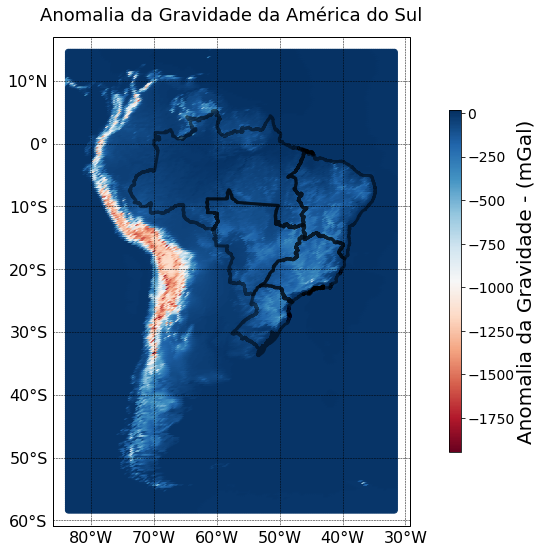

In [ ]:
# Definicao das dimensões da janela gráfica:
n = 10 # dimensao em pixels na direcao x
m = 9  # dimensao em pixels na direcao y

fig = plt.figure(figsize=(n,m)) # n pixels em m e 12 em y

# Criacao do ambiente com o tipo de projecao desejada:
ax = fig.add_subplot(111, projection=projecao )

# Area do grafico:
ax.set_extent([data.Lon.min()-2.5, data.Lon.max()+2.5, 
               data.Lat.min()-2.5, data.Lat.max()+2.5]
              , projecao)

#adicionando linhas de grade
g1 = ax.gridlines(crs=projecao, 
                  draw_labels=True, linestyle='--', 
                  linewidth=0.5,
                  color='black',
                  alpha=1)

# importando o shape das regioes do brasil:
fname='grandes_regioes/grandes_regioes_shp.shp'

#adicionando os contornos das grandes regiões brasileiras via arquivo shape:
ax.add_geometries(Reader(fname).geometries(),
                  projecao,facecolor='none',
                  edgecolor='black', linewidth=3,alpha=0.5)

#adicionando o scatter com as informaçoes dos dataframes
f2=ax.scatter(data.Lon, data.Lat,
              c=data.Anom,
              cmap='RdBu',
              vmin=data.Anom.min(), vmax=data.Anom.max(),
              transform=projecao)

#removendo os eixos do lado direito e de cima:
g1.ylabels_right = False
g1.xlabels_top = False

#formatando os eixos para georreferenciar
g1.yformatter = LATITUDE_FORMATTER
g1.xformatter = LONGITUDE_FORMATTER

g1.xlabel_style = {'size': 16}
g1.ylabel_style = {'size': 16}

# Barra de cores:
cbar=plt.colorbar(f2,shrink=0.7,orientation='vertical',pad=0.07,aspect=30) #, ticks=v)
cbar.ax.tick_params(labelsize=14,color='black',labelcolor='black')
cbar.set_label('Anomalia da Gravidade - (mGal)',fontsize=20,labelpad=2)

# Titulo do gráfico:
ax.set_title('Anomalia da Gravidade da América do Sul', fontsize=18, y=1.02)


plt.show()

In [ ]:
## <center> Fim! Muito obrigado pela sua atenção!